In [1]:
from read_and_clean_documents import *
from text_processing import *
from clustering_functions import *
from plot import *
import pandas as pd


DATA_FOLDER = "../data/"
HTML_DATA_FOLDER = "../data/gap-html/"




In [2]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/openpose/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:


#Initial read
folder_file_list = get_file_names(HTML_DATA_FOLDER)
cleaned_content = get_cleaned_html_documents(folder_file_list)
write_list_to_file('cleaned_content.txt', cleaned_content)
frequent_words_removed_content_as_list = remove_frequent_items(cleaned_content_as_list, 75)
write_list_to_file('freq_words_removed_content.txt', frequent_words_removed_content)

#


NameError: name 'cleaned_content_as_list' is not defined

In [4]:
# Read from cleaned file, not htmls
(cleaned_content_as_list, cleaned_content_as_str) = \
    read_from_cleaned_file('cleaned_content.txt')
(frequent_words_removed_content_as_list, frequent_words_removed_content_as_str) = \
    read_from_cleaned_file('freq_words_removed_content.txt')
(book_names, authors) = read_authors_book_names()



/home/openpose/.local/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
No handles with labels found to put 

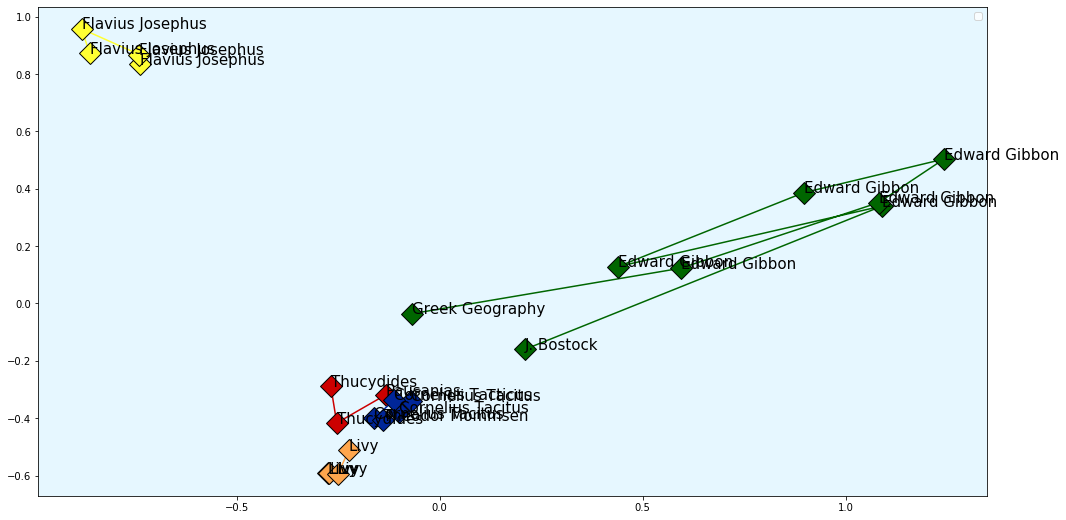

In [5]:
(similarity_matrix, tfidf_matrix) = get_similarity_matrix(frequent_words_removed_content_as_str)

km_clusters = get_cluster_kmeans(tfidf_matrix, 5)  # KMeans
x_pos, y_pos = pca_reduction(similarity_matrix, 10)
scatter_clusters(x_pos, y_pos, km_clusters, authors) # Scatter K-means with PCA


In [ ]:

dbscan_clusters = get_dbscan_cluster(tfidf_matrix, 1.2)
dbscan_clusters = dbscan_clusters + 1  # DBScan clusters start from -1
x_pos, y_pos = multidim_scaling(similarity_matrix, 2)  # MultidimScaling
scatter_clusters(x_pos, y_pos, dbscan_clusters, authors) # Scatter K-means with PCA



In [ ]:
#dendogram(similarity_matrix, book_names)


In [ ]:

lda_model = lda_topic_modeling(frequent_words_removed_content_as_list, 5)
print(lda_model.print_topics(num_topics=5, num_words=5))

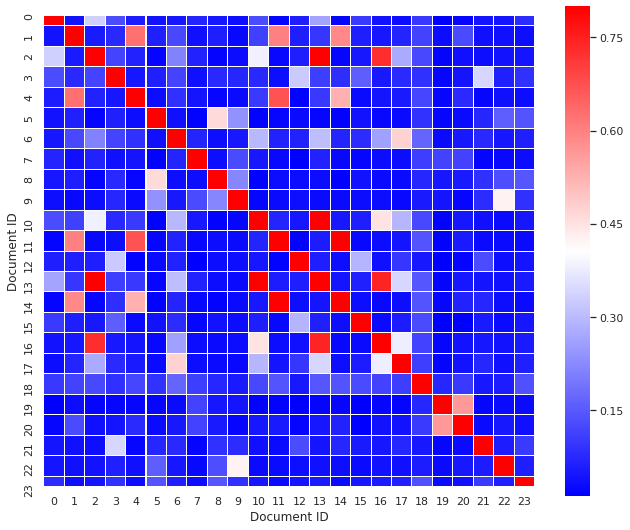

In [24]:
from string import *
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style="white")
sns.set(font_scale=1)
mask = np.zeros_like(similarity_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = False
f, ax = plt.subplots(figsize=(11, 9))
b = similarity_matrix
c = sns.heatmap(b, mask=mask, cmap="bwr", vmax=.8,
            square=True, linewidths=0.01,  ax=ax)
c.set(xlabel='Document ID', ylabel='Document ID')
plt.show()
fig = c.get_figure()
fig.suptitle('TF-IDF Document Similarity Matrix', fontsize=25)

fig.savefig("output.png")